# Assignment 2 - DS 3021

Goal: Build two data prep pipelines using different datasets to get practice with data preparation and question building.

Step one: Review these two datasets and brainstorm problems that could be addressed with the dataset. Identify a question for each dataset. 

[College Completion](https://data.world/databeats/college-completion/workspace/file?filename=cc_institution_details.csv)

[Data Dictionary](https://data.world/databeats/college-completion/workspace/data-dictionary)

[Job_Placement](https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv)

[Details](https://www.kaggle.com/benroshan/factors-affecting-campus-placement/discussion/280612)

Step two: Work through the steps outlined in the examples to include the following elements: 

  * What is a independent Business Metric for your problem? 
  * Data preparation:  
    * correct variable type/class as needed
    * collapse factor levels as needed
    * one-hot encoding factor variables 
    * normalize the continuous variables
    * drop unneeded variables
    * create target variable if needed
  * Calculate the prevalence of the target variable 
  * Create the necessary data partitions (Train,Tune,Test)
  
Step three: What do your instincts tell you about the data. Can it address your problem, what areas/items are you worried about? 



In [159]:
# Imports
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler


### Question: "Assuming that higher degree progress results in higher employment rate, can we predict which degree type has an advantage of employment?"

### Independent Business Metric: Employment Rate by Degree Type


In [160]:
job_placement = pd.read_csv("https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv")
job_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


We would like to change the degree_t and status to categorical variable.

In [161]:
job_placement[['degree_t', 'status']] = job_placement[['degree_t', 'status']].astype('category')
print(job_placement.dtypes)


sl_no                int64
gender              object
ssc_p              float64
ssc_b               object
hsc_p              float64
hsc_b               object
hsc_s               object
degree_p           float64
degree_t          category
workex              object
etest_p            float64
specialisation      object
mba_p              float64
status            category
salary             float64
dtype: object


In [162]:
job_placement.degree_t.value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [163]:
job_placement.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

As the number of groups are pretty small, there is no need to collapse this factor

In [164]:
job_placement.degree_p.value_counts()

degree_p
65.00    20
66.00    13
72.00    12
64.00    11
58.00     9
         ..
64.80     1
56.30     1
91.00     1
56.87     1
77.60     1
Name: count, Length: 89, dtype: int64

In [165]:
#We would like to scale and normalize this data "degree_p" since its numeric
degree_p_sc = StandardScaler().fit_transform(job_placement[['degree_p']])
degree_p_sc[:10]

array([[-1.14010225],
       [ 1.51326671],
       [-0.32284282],
       [-1.95736168],
       [ 0.9439093 ],
       [ 0.11983938],
       [ 1.72030576],
       [-0.05042301],
       [ 0.76683642],
       [-0.73147253]])

In [166]:
degree_p_norm = MinMaxScaler().fit_transform(job_placement[['degree_p']])
degree_p_norm[:10]

array([[0.19512195],
       [0.6702439 ],
       [0.34146341],
       [0.04878049],
       [0.56829268],
       [0.42073171],
       [0.70731707],
       [0.3902439 ],
       [0.53658537],
       [0.26829268]])

<Axes: ylabel='Density'>

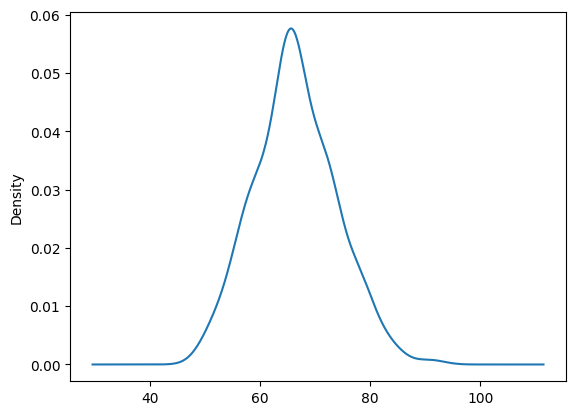

In [167]:
job_placement.degree_p.plot.density()

<Axes: ylabel='Density'>

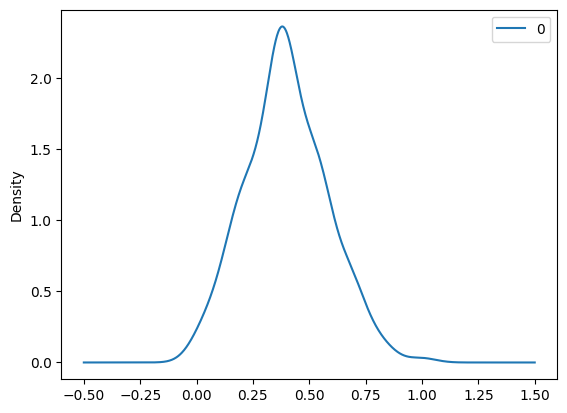

In [168]:
pd.DataFrame(degree_p_norm).plot.density()

In [169]:
#Not only the degree_p column, we should also normalize other numeric variables 
#for them to have the same weight

abc = list(job_placement.select_dtypes("number"))
job_placement[abc] = MinMaxScaler().fit_transform(job_placement[abc])
job_placement[:10]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0.000000,M,0.538240,Others,0.889621,Others,Commerce,0.195122,Sci&Tech,No,0.104167,Mkt&HR,0.284483,Placed,0.094595
1,0.004673,M,0.792414,Central,0.680890,Others,Science,0.670244,Sci&Tech,Yes,0.760417,Mkt&Fin,0.564843,Placed,0.000000
2,0.009346,M,0.497011,Central,0.510708,Central,Arts,0.341463,Comm&Mgmt,No,0.520833,Mkt&Fin,0.247001,Placed,0.067568
3,0.014019,M,0.311482,Central,0.247117,Central,Science,0.048780,Sci&Tech,No,0.333333,Mkt&HR,0.308096,Not Placed,NaN
4,0.018692,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,Placed,0.304054
5,0.023364,M,0.290868,Others,0.210873,Others,Science,0.420732,Sci&Tech,Yes,0.104167,Mkt&Fin,0.013868,Not Placed,NaN
6,0.028037,F,0.105339,Others,0.200988,Others,Commerce,0.707317,Comm&Mgmt,No,0.505833,Mkt&Fin,0.077961,Not Placed,NaN
7,0.032710,M,0.847454,Central,0.444811,Central,Science,0.390244,Sci&Tech,Yes,0.354167,Mkt&Fin,0.409670,Placed,0.070270
8,0.037383,M,0.661925,Central,0.691928,Central,Commerce,0.536585,Comm&Mgmt,No,0.861250,Mkt&Fin,0.377811,Placed,0.041892
9,0.042056,M,0.352711,Central,0.543657,Central,Commerce,0.268293,Comm&Mgmt,No,0.083333,Mkt&Fin,0.037481,Not Placed,NaN


In [170]:
#Now we have to do some one-hot encoding so that categorical variables can be in numeric format
category_list = list(job_placement.select_dtypes('category'))
job_placement_1h = pd.get_dummies(job_placement, columns = category_list)
#get_dummies encodes categorical variables into binary
job_placement_1h

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,salary,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status_Not Placed,status_Placed
0,0.000000,M,0.538240,Others,0.889621,Others,Commerce,0.195122,No,0.104167,Mkt&HR,0.284483,0.094595,False,False,True,False,True
1,0.004673,M,0.792414,Central,0.680890,Others,Science,0.670244,Yes,0.760417,Mkt&Fin,0.564843,0.000000,False,False,True,False,True
2,0.009346,M,0.497011,Central,0.510708,Central,Arts,0.341463,No,0.520833,Mkt&Fin,0.247001,0.067568,True,False,False,False,True
3,0.014019,M,0.311482,Central,0.247117,Central,Science,0.048780,No,0.333333,Mkt&HR,0.308096,NaN,False,False,True,True,False
4,0.018692,M,0.925788,Central,0.602965,Central,Commerce,0.568293,No,0.975000,Mkt&Fin,0.160795,0.304054,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,M,0.818594,Others,0.741351,Others,Commerce,0.673171,No,0.854167,Mkt&Fin,0.872564,0.270270,True,False,False,False,True
211,0.985981,M,0.352711,Others,0.378913,Others,Science,0.536585,No,0.500000,Mkt&Fin,0.090330,0.101351,False,False,True,False,True
212,0.990654,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Yes,0.187500,Mkt&Fin,0.693778,0.128378,True,False,False,False,True
213,0.995327,F,0.682540,Others,0.477759,Others,Commerce,0.195122,No,0.416667,Mkt&HR,0.338081,0.005405,True,False,False,False,True


count    215.000000
mean       0.399273
std        0.179482
min        0.000000
25%        0.268293
50%        0.390244
75%        0.536585
max        1.000000
Name: degree_p, dtype: float64

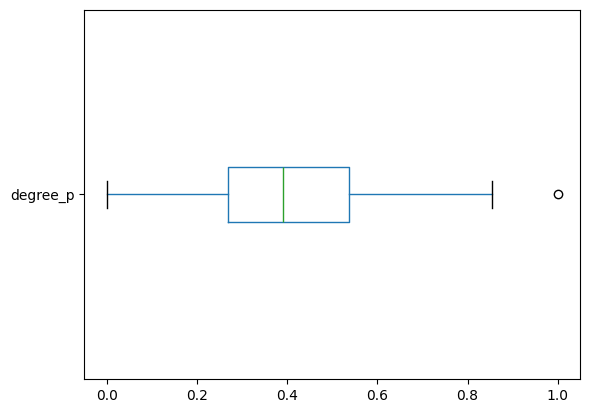

In [171]:
job_placement_1h.rename(columns={'degree_t_Comm&Mgmt': 'degree_t_Comm_and_Mgmt'}, inplace=True)
job_placement_1h.rename(columns={'degree_t_Sci&Tech': 'degree_t_Sci_and_Tech'}, inplace=True)


job_placement_1h.boxplot(column = "degree_p", vert = False, grid = False)
job_placement_1h.degree_p.describe()
#Upper quartile value is 0.536

In [172]:
job_placement_1h["degree_p_f"] = pd.cut(job_placement_1h['degree_p'], bins=[-1, 0.54, 1], labels=[0, 1])
print(job_placement_1h[:10])


      sl_no gender     ssc_p    ssc_b     hsc_p    hsc_b     hsc_s  degree_p  \
0  0.000000      M  0.538240   Others  0.889621   Others  Commerce  0.195122   
1  0.004673      M  0.792414  Central  0.680890   Others   Science  0.670244   
2  0.009346      M  0.497011  Central  0.510708  Central      Arts  0.341463   
3  0.014019      M  0.311482  Central  0.247117  Central   Science  0.048780   
4  0.018692      M  0.925788  Central  0.602965  Central  Commerce  0.568293   
5  0.023364      M  0.290868   Others  0.210873   Others   Science  0.420732   
6  0.028037      F  0.105339   Others  0.200988   Others  Commerce  0.707317   
7  0.032710      M  0.847454  Central  0.444811  Central   Science  0.390244   
8  0.037383      M  0.661925  Central  0.691928  Central  Commerce  0.536585   
9  0.042056      M  0.352711  Central  0.543657  Central  Commerce  0.268293   

  workex   etest_p specialisation     mba_p    salary  degree_t_Comm_and_Mgmt  \
0     No  0.104167         Mkt&HR  0.2

In [173]:
prevalence = job_placement_1h.degree_p_f.value_counts()[1]/len(job_placement_1h.degree_p_f)
prevalence

np.float64(0.19534883720930232)

In [174]:
print(job_placement_1h.degree_p_f.value_counts())
print(42 / (172+42))
#The values align

degree_p_f
0    172
1     42
Name: count, dtype: int64
0.19626168224299065


In [175]:
#I will remove values such as gender or all the high school related data because they are irrelevant
job_placement_dt = job_placement_1h.drop(["gender", "hsc_p", "hsc_b", "ssc_p", "ssc_b"], axis=1)
job_placement_dt


,sl_no,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,salary,degree_t_Comm_and_Mgmt,degree_t_Others,degree_t_Sci_and_Tech,status_Not Placed,status_Placed,degree_p_f
0,0.000000,Commerce,0.195122,No,0.104167,Mkt&HR,0.284483,0.094595,False,False,True,False,True,0
1,0.004673,Science,0.670244,Yes,0.760417,Mkt&Fin,0.564843,0.000000,False,False,True,False,True,1
2,0.009346,Arts,0.341463,No,0.520833,Mkt&Fin,0.247001,0.067568,True,False,False,False,True,0
3,0.014019,Science,0.048780,No,0.333333,Mkt&HR,0.308096,NaN,False,False,True,True,False,0
4,0.018692,Commerce,0.568293,No,0.975000,Mkt&Fin,0.160795,0.304054,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,Commerce,0.673171,No,0.854167,Mkt&Fin,0.872564,0.270270,True,False,False,False,True,1
211,0.985981,Science,0.536585,No,0.500000,Mkt&Fin,0.090330,0.101351,False,False,True,False,True,0
212,0.990654,Commerce,0.560976,Yes,0.187500,Mkt&Fin,0.693778,0.128378,True,False,False,False,True,1
213,0.995327,Commerce,0.195122,No,0.416667,Mkt&HR,0.338081,0.005405,True,False,False,False,True,0


In [176]:
X = job_placement_dt[["degree_t_Comm_and_Mgmt", "degree_t_Sci_and_Tech", "degree_t_Others", "degree_p_f"]]
y = job_placement_1h[["status_Placed"]]
#X is the features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
prevalence_full = y["status_Placed"].value_counts(normalize=True)*100
prevalence_train = y_train['status_Placed'].value_counts(normalize=True) * 100
prevalence_test = y_test['status_Placed'].value_counts(normalize=True) * 100
print(prevalence_full, prevalence_train, prevalence_test)

status_Placed
True     68.837209
False    31.162791
Name: proportion, dtype: float64 status_Placed
True     68.023256
False    31.976744
Name: proportion, dtype: float64 status_Placed
True     72.093023
False    27.906977
Name: proportion, dtype: float64


In [178]:
summary_train = X_train.describe()
print(summary_train)

       degree_t_Comm_and_Mgmt degree_t_Sci_and_Tech degree_t_Others  \
count                     172                   172             172   
unique                      2                     2               2   
top                      True                 False           False   
freq                      117                   126             163   

        degree_p_f  
count          171  
unique           2  
top              0  
freq           140  


In [179]:
summary_test = X_test.describe()
print(summary_test)

       degree_t_Comm_and_Mgmt degree_t_Sci_and_Tech degree_t_Others  \
count                      43                    43              43   
unique                      2                     2               2   
top                      True                 False           False   
freq                       28                    30              41   

        degree_p_f  
count           43  
unique           2  
top              0  
freq            32  


### Step 3: What do your instincts tell you about the data. Can it address your problem, what areas/items are you worried about?

According to the data above, around 70% of the people in the data are placed in their occupation where 30% of them are unemployed. For degree types, 117 out of 172 students have degrees in Commerce and Management while 46 students have degrees in Science and Technology with 9 other degrees. Commerce and Management is the most prevalent degree. My instinct tells me that having a degree in Commerce and Management will make your chances of getting employed higher. With further statistical analysis between my dataset, I believe it can address that question. My concern is the data itself, as degree process metric could be biased and nuanced. 

### Step 4: Create functions for your two pipelines that produces the train and test datasets.


In [180]:
def train_test_datasets(X, y, test_size = 0.2, random_state = 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X = job_placement_dt[["degree_t_Comm_and_Mgmt", "degree_t_Sci_and_Tech", "degree_t_Others", "degree_p_f"]]
y = job_placement_dt["status_Placed"]

X_train, X_test, y_train, y_test = train_test_datasets(X, y)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:      degree_t_Comm_and_Mgmt  degree_t_Sci_and_Tech  degree_t_Others degree_p_f
93                     True                  False            False          0
84                    False                   True            False          0
95                     True                  False            False          0
137                    True                  False            False          0
210                    True                  False            False          1
..                      ...                    ...              ...        ...
106                   False                   True            False          0
14                     True                  False            False          0
92                     True                  False            False          0
179                   False                   True            False          0
102                    True                  False            False          0

[172 rows x 4 columns]
X_test:      degree

### 2nd Dataset - Question: Is there a correlation between institutional type and cohort size?

### Independent Business Metric: Institutional Cohort Size Index, where we measure the average cohort size relative to the type of institution

In [181]:
college = cc_institution_details = pd.read_csv("cc_institution_details.csv")
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [182]:
#Data types of those three variables
print(college['level'].dtype, college['control'].dtype, college['cohort_size'].dtype)

object object float64


In [183]:
college.level.value_counts()
college.control.value_counts()
#We would like to change the two variables into categorical variables


control
Public                    1558
Private not-for-profit    1248
Private for-profit         992
Name: count, dtype: int64

In [184]:
college[['level', 'control']] = college[['level', 'control']].astype('category')
print(college['level'].dtype, college['control'].dtype)

category category


In [185]:
cohort_size_sc = StandardScaler().fit_transform(college[['cohort_size']])
cohort_size_sc[:10]

array([[ 0.23261623],
       [ 0.74631992],
       [-0.68144357],
       [ 0.10471025],
       [ 0.72032277],
       [ 3.93045088],
       [-0.06687094],
       [-0.12718433],
       [ 3.646562  ],
       [-0.21765441]])

In [186]:
cohort_size_n = MinMaxScaler().fit_transform(college[['cohort_size']])
cohort_size_n[:10]

array([[5.42888834e-02],
       [8.47300961e-02],
       [1.23243776e-04],
       [4.67093912e-02],
       [8.31895489e-02],
       [2.73416317e-01],
       [3.65417796e-02],
       [3.29677101e-02],
       [2.56593542e-01],
       [2.76066059e-02]])

<Axes: ylabel='Density'>

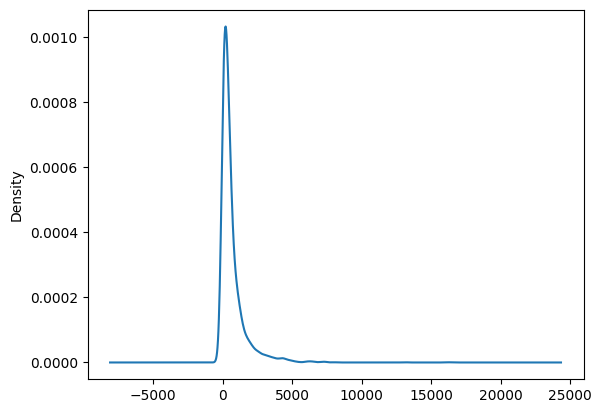

In [187]:
college.cohort_size.plot.density()

<Axes: ylabel='Density'>

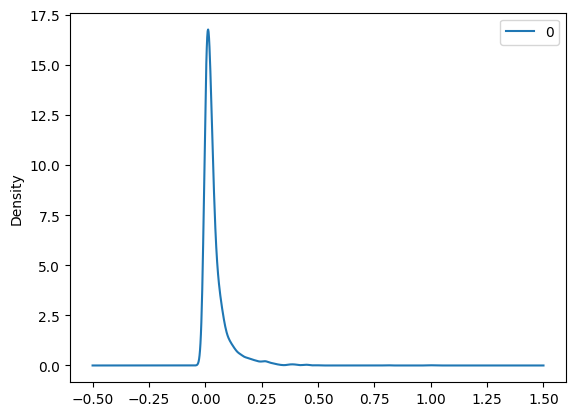

In [188]:
pd.DataFrame(cohort_size_n).plot.density()

In [189]:
xyz = list(college.select_dtypes('number'))
college[xyz] = MinMaxScaler().fit_transform(college[xyz])
college

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0.000000,0.000000,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,0.407615,0.356098,1.0,0.521127,232937|100724|405997|113607|139533|144005|2285...,0.104348,0.746124,99.7|07,NaN,0.054289
1,0.000263,0.000024,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,0.104348,0.203488,56.0|07,UAB,0.084730
2,0.000527,0.000096,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,0.130435,0.486434,100.0|07,NaN,0.000123
3,0.000790,0.000139,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.000000,0.219512,0.0,0.000000,232186|133881|196103|196413|207388|171128|1900...,0.104348,0.203488,43.1|07,UAH,0.046709
4,0.001053,0.000187,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,0.104348,0.746124,88.0|07,ASU,0.083190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.365217,0.155039,NaN,NaN,0.000678
3794,0.999210,0.965468,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.634783,0.155039,NaN,NaN,0.001972
3795,0.999473,0.977658,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.165217,0.155039,NaN,NaN,0.000431
3796,0.999737,0.998906,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.034783,0.155039,NaN,NaN,0.008874


In [190]:
#One Hot Encoding

cat_list = list(college.select_dtypes('category'))
college_1h= pd.get_dummies(college, columns = cat_list)
college_1h

,index,unitid,chronname,city,state,basic,hbcu,flagship,long_x,lat_y,...,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,0.000000,0.000000,Alabama A&M University,Normal,Alabama,Masters Colleges and Universities--larger prog...,X,NaN,0.790292,0.292177,...,0.104348,0.746124,99.7|07,NaN,0.054289,False,True,False,False,True
1,0.000263,0.000024,University of Alabama at Birmingham,Birmingham,Alabama,Research Universities--very high research acti...,NaN,NaN,0.787680,0.267361,...,0.104348,0.203488,56.0|07,UAB,0.084730,False,True,False,False,True
2,0.000527,0.000096,Amridge University,Montgomery,Alabama,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,0.794572,0.245286,...,0.130435,0.486434,100.0|07,NaN,0.000123,False,True,False,True,False
3,0.000790,0.000139,University of Alabama at Huntsville,Huntsville,Alabama,Research Universities--very high research acti...,NaN,NaN,0.789533,0.291004,...,0.104348,0.203488,43.1|07,UAH,0.046709,False,True,False,False,True
4,0.001053,0.000187,Alabama State University,Montgomery,Alabama,Masters Colleges and Universities--larger prog...,X,NaN,0.793252,0.245319,...,0.104348,0.746124,88.0|07,ASU,0.083190,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,Grace College of Divinity,Fayetteville,North Carolina,Not applicable- not in Carnegie universe,NaN,NaN,0.872837,0.297512,...,0.365217,0.155039,NaN,NaN,0.000678,False,True,False,True,False
3794,0.999210,0.965468,John Paul the Great Catholic University,Escondido,California,Not applicable- not in Carnegie universe,NaN,NaN,0.459168,0.259974,...,0.634783,0.155039,NaN,NaN,0.001972,False,True,False,True,False
3795,0.999473,0.977658,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,Not applicable- not in Carnegie universe,NaN,NaN,0.748321,0.368084,...,0.165217,0.155039,NaN,NaN,0.000431,False,True,True,False,False
3796,0.999737,0.998906,Minneapolis Media Institute,Edina,Minnesota,Not applicable- not in Carnegie universe,NaN,NaN,0.716903,0.487486,...,0.034783,0.155039,NaN,NaN,0.008874,True,False,True,False,False


count    3467.000000
mean        0.040504
std         0.059267
min         0.000000
25%         0.008011
50%         0.021876
75%         0.048158
max         1.000000
Name: cohort_size, dtype: float64

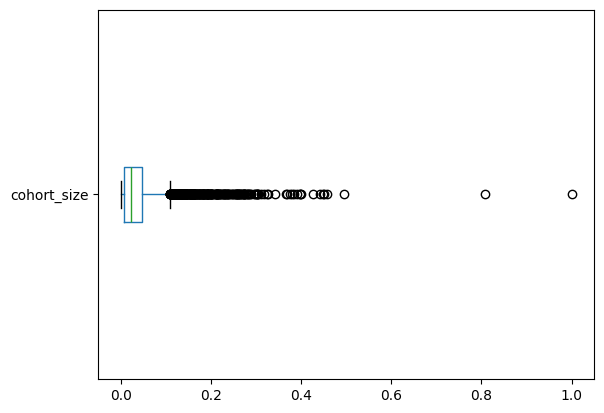

In [191]:
college_1h.boxplot(column = 'cohort_size', vert = False, grid = False)
college_1h.cohort_size.describe()

In [192]:
#The boxplot does look weird, but it implies that most cohort sizes are small, yet there are some schools
#with huge number of cohort size

college_1h['cohort_size_f'] = pd.cut(college_1h.cohort_size, bins = [-1, 0.048, 1], labels = [0,1])
college_1h

,index,unitid,chronname,city,state,basic,hbcu,flagship,long_x,lat_y,...,carnegie_ct,counted_pct,nicknames,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,cohort_size_f
0,0.000000,0.000000,Alabama A&M University,Normal,Alabama,Masters Colleges and Universities--larger prog...,X,NaN,0.790292,0.292177,...,0.746124,99.7|07,NaN,0.054289,False,True,False,False,True,1
1,0.000263,0.000024,University of Alabama at Birmingham,Birmingham,Alabama,Research Universities--very high research acti...,NaN,NaN,0.787680,0.267361,...,0.203488,56.0|07,UAB,0.084730,False,True,False,False,True,1
2,0.000527,0.000096,Amridge University,Montgomery,Alabama,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,0.794572,0.245286,...,0.486434,100.0|07,NaN,0.000123,False,True,False,True,False,0
3,0.000790,0.000139,University of Alabama at Huntsville,Huntsville,Alabama,Research Universities--very high research acti...,NaN,NaN,0.789533,0.291004,...,0.203488,43.1|07,UAH,0.046709,False,True,False,False,True,0
4,0.001053,0.000187,Alabama State University,Montgomery,Alabama,Masters Colleges and Universities--larger prog...,X,NaN,0.793252,0.245319,...,0.746124,88.0|07,ASU,0.083190,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,Grace College of Divinity,Fayetteville,North Carolina,Not applicable- not in Carnegie universe,NaN,NaN,0.872837,0.297512,...,0.155039,NaN,NaN,0.000678,False,True,False,True,False,0
3794,0.999210,0.965468,John Paul the Great Catholic University,Escondido,California,Not applicable- not in Carnegie universe,NaN,NaN,0.459168,0.259974,...,0.155039,NaN,NaN,0.001972,False,True,False,True,False,0
3795,0.999473,0.977658,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,Not applicable- not in Carnegie universe,NaN,NaN,0.748321,0.368084,...,0.155039,NaN,NaN,0.000431,False,True,True,False,False,0
3796,0.999737,0.998906,Minneapolis Media Institute,Edina,Minnesota,Not applicable- not in Carnegie universe,NaN,NaN,0.716903,0.487486,...,0.155039,NaN,NaN,0.008874,True,False,True,False,False,0


In [193]:
prevalence2 = college_1h.cohort_size_f.value_counts()[1]/len(college_1h.cohort_size_f)
print(prevalence2)

0.22880463401790416


In [194]:
print(college_1h.cohort_size_f.value_counts())
print(869 / (2598 + 869))

#They do not exactly match, maybe because it contains null values
cleaned_college = college.dropna(subset = ['cohort_size'])
#I will try it again
prevalence3 = college_1h.cohort_size_f.value_counts()[1]/len(college_1h.cohort_size_f)
print(prevalence3)


cohort_size_f
0    2598
1     869
Name: count, dtype: int64
0.25064897605999426
0.22880463401790416


In [195]:
#They do not exactly match, maybe because it contains null values
cleaned_college = college_1h.dropna(subset = ['cohort_size'])
#I will try it again
prevalence3 = cleaned_college.cohort_size_f.value_counts()[1]/len(cleaned_college.cohort_size_f)
print(prevalence3)


0.25064897605999426


In [196]:
print(cleaned_college.cohort_size_f.value_counts())
print(869 / (2598 + 869))
#Now it worked

cohort_size_f
0    2598
1     869
Name: count, dtype: int64
0.25064897605999426


In [197]:
#There are a lot of data to drop, but I will just do few for now
college_df = cleaned_college.drop(["basic", "hbcu", "flagship", "site"], axis =1)
#I prioritized to delete columns that contain null values or columns that are completely irrelevant

In [198]:
Train, Test = train_test_split(college_df, train_size = 100, stratify = college_df.cohort_size_f)
print(Train.shape)
print(Test.shape)

(100, 63)
(3367, 63)


In [199]:
Tune, Test = train_test_split(Test, train_size = 0.5, stratify = Test.cohort_size_f)
print(Train.cohort_size_f.value_counts())
print(25/100)

cohort_size_f
0    75
1    25
Name: count, dtype: int64
0.25


In [200]:
print(Tune.cohort_size_f.value_counts())
print(53 / (157+53))

cohort_size_f
0    1261
1     422
Name: count, dtype: int64
0.2523809523809524


In [201]:
print(Train.cohort_size_f.value_counts())
print(25 / 100)

cohort_size_f
0    75
1    25
Name: count, dtype: int64
0.25


In [202]:
X = college_df[['level_2-year', 'level_4-year', "control_Private for-profit",
                'control_Private not-for-profit', 'control_Public']]
y = college_df[["cohort_size_f"]]
#X is the features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [203]:
print(X_test['level_2-year'].sum())  # Number of True for each
print(X_test['level_4-year'].sum())  
print(X_test["control_Private for-profit"].sum())
print(X_test["control_Private not-for-profit"].sum())
print(X_test["control_Public"].sum())

291
403
145
238
311


In [204]:
summary_test = X_test.describe()
print(summary_test)

       level_2-year level_4-year control_Private for-profit  \
count           694          694                        694   
unique            2            2                          2   
top           False         True                      False   
freq            403          403                        549   

       control_Private not-for-profit control_Public  
count                             694            694  
unique                              2              2  
top                             False          False  
freq                              456            383  


In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_dtree)

print(f'Precision: {precision}')

Precision: 0.6666666666666666


### Step three: What do your instincts tell you about the data. Can it address your problem, what areas/items are you worried about?

According to the summary_test, the majority schools are 4-year public colleges. There aren't data about the relationship among the college types and cohort size, however, based on the boxplot we observed above, we were able to know that there are some schools with much bigger cohort size compared to most schools. Regarding my data, I was concerned with missing values as I had to remove the NA values. If there were data in the place of NA values that is accurate, the data that I produce would've been a better quality. 

### Step four: Create functions for your two pipelines that produces the train and test datasets.

In [206]:
def train_test_datasets(X, y, test_size = 0.2, random_state = 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X = college_df[['level_2-year', 'level_4-year', "control_Private for-profit",
                'control_Private not-for-profit', 'control_Public']]
y = college_df[["cohort_size_f"]]

X_train, X_test, y_train, y_test = train_test_datasets(X, y)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:       level_2-year  level_4-year  control_Private for-profit  \
1607          True         False                       False   
3410         False          True                        True   
1672          True         False                       False   
3097          True         False                       False   
2995         False          True                       False   
...            ...           ...                         ...   
1170          True         False                       False   
1208         False          True                       False   
1378         False          True                       False   
923           True         False                       False   
3402         False          True                        True   

      control_Private not-for-profit  control_Public  
1607                           False            True  
3410                           False           False  
1672                            True           False  
30